In [13]:
import pandas as pd 
import numpy as np

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [23]:
def knn(train_data, test_data, k):
    predictions = []
    for test_point in test_data:
        distances = []
        for train_point in train_data:
            distance = np.linalg.norm(test_point[:-1] - train_point[:-1]) 
            distances.append((train_point, distance))
        distances.sort(key=lambda x: x[1])
        neighbors = [point[0] for point in distances[:k]]
        labels = [neighbor[-1] for neighbor in neighbors]
        prediction = max(set(labels), key=labels.count)
        predictions.append(prediction)
    return predictions

In [15]:
data = load_breast_cancer()
X = data.data
y = data.target

In [26]:
df = pd.DataFrame(X, columns=data.feature_names)

In [28]:
null_values = df.isnull().sum()
null_values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [29]:
print("First few rows of the data:")
print(df.head())

print("\nColumn Names:")
print(df.columns)

First few rows of the data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness   
0        17.99         10.38          122.80     1001.0          0.11840  \
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry   
0           0.27760          0.3001              0.14710         0.2419  \
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  wor

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
k = 5  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.956140350877193


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

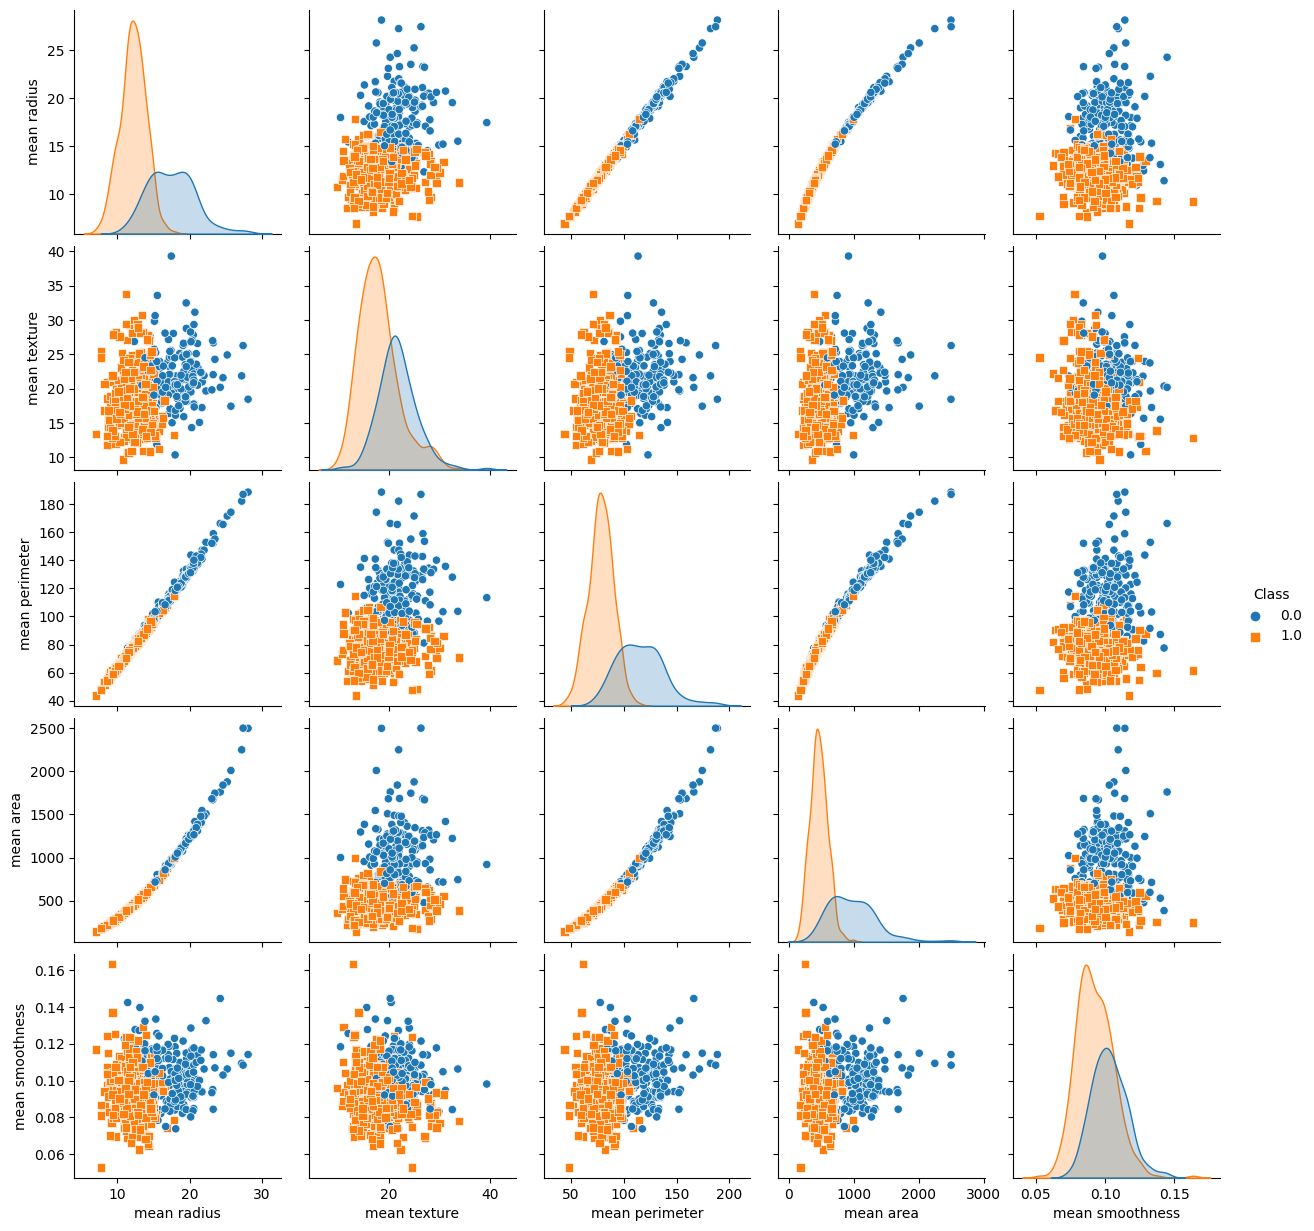

In [22]:
subset_features = data.feature_names[:5] 
subset_data = data.data[:, :5]

subset_data = np.column_stack((subset_data, data.target))

df = pd.DataFrame(subset_data, columns=subset_features.tolist() + ["Class"])

sns.pairplot(df, hue="Class", markers=["o", "s"])
plt.show()